In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image,ImageFilter
import os
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline

In [178]:
cmap = LinearSegmentedColormap.from_list('mycmap', ['black','red', 'white'])

def AbsorbIma(filename,rottime=0,vmin='auto',vmax='auto',cmap='jet'):    
    filelist=[os.path.splitext(filename)[0][:-1]+str(i+1)+os.path.splitext(filename)[1] for i in range(3)]
    #print(filelist)
    fig, ax = plt.subplots(figsize=(10,10))
    PicList=[np.array(Image.open(filelist[i]),dtype='float64') for i in range(len(filelist))]
    #plt.imshow(PicList[0])
    #plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')
    s=np.log((PicList[1]-PicList[2])/(PicList[0]-PicList[2]))
    if (vmax=='auto') or (vmin=='auto'):
        im=ax.imshow((np.rot90(s,rottime)),interpolation = 'none' ,
                 cmap=cmap,vmin=0)
    else:
        im=ax.imshow((np.rot90(s,rottime)),interpolation = 'none' ,
                 cmap=cmap,vmin=vmin,vmax=vmax)
    fig.colorbar(im,fraction=0.046, pad=0.04)
    
def FlorIma(filename,rottime=0,vmin='auto',vmax='auto',cmap='jet',trp='False'):    
    filelist=[os.path.splitext(filename)[0][:-1]+str(i+1)+os.path.splitext(filename)[1] for i in range(2)]
    #print(filelist)
    fig, ax = plt.subplots(figsize=(10,10))
    PicList=[np.array(Image.open(filelist[i]),dtype='float64') for i in range(len(filelist))]
    #plt.imshow(PicList[0])
    #plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')
    s=(PicList[0]-PicList[1])[174:324,179:329]
    if (trp=='True'):
        s=np.transpose(s)
    if (vmax=='auto') or (vmin=='auto'):
        im=ax.imshow((np.rot90(s,rottime)),interpolation = 'none' ,
                 cmap=cmap,vmin=0)
    else:
        im=ax.imshow((np.rot90(s,rottime)),interpolation = 'none' ,
                 cmap=cmap,vmin=vmin,vmax=vmax)
    cbar=fig.colorbar(im,fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=10)

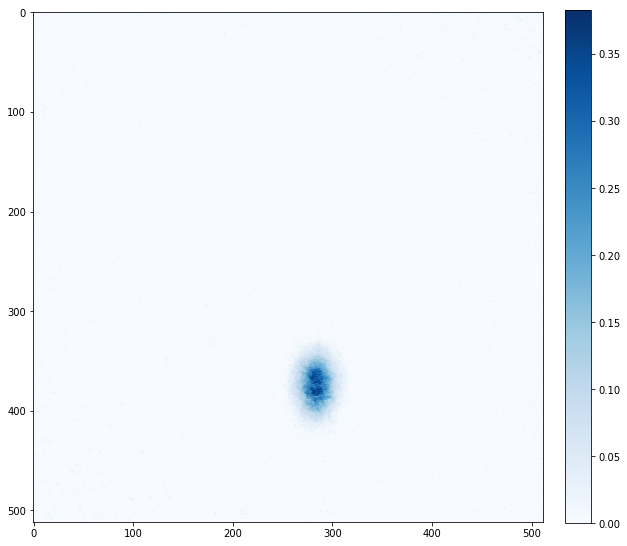

In [181]:
AbsorbIma('./Data/test_0.00-18.02.01-16.35.25--272-1.tiff',1,cmap='Blues')

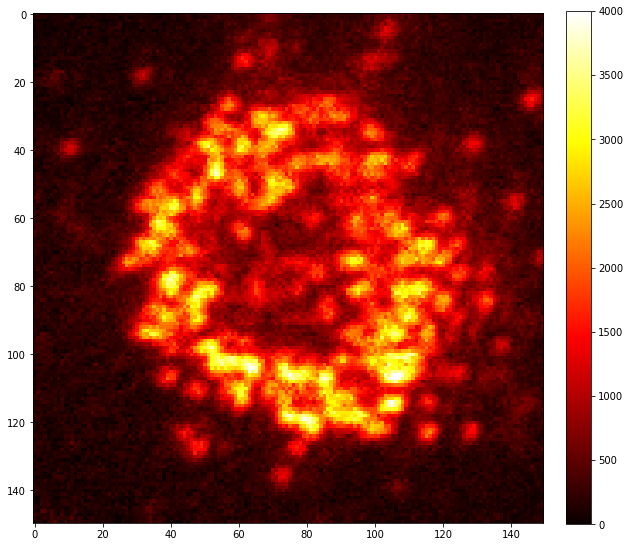

In [180]:
FlorIma('./data/EtaloningPics_1.00-18.02.08-17.49.11--065-1.tiff'
        ,2,0,4000,cmap='hot',trp='True')
plt.savefig('./data/BestMottInsulator.png')